<a href="https://colab.research.google.com/github/Benbuk/GOMYCODE_DS_Bootcamp/blob/main/Streamlit2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Objective

In this checkpoint, we are going to work on the 'Financial Inclusion in Africa' dataset that was provided as part of the Financial Inclusion in Africa hosted by the Zindi platform.

dataset description: The dataset contains demographic information and what financial services are used by approximately 33,600 individuals across East Africa. The ML model role is to predict which individuals are most likely to have or use a bank account.

The term financial inclusion means:  individuals and businesses have access to useful and affordable financial products and services that meet their needs – transactions, payments, savings, credit and insurance – delivered in a responsible and sustainable way.

[➡️ dataset link](https://drive.google.com/file/d/1FrFTfUln67599LTm2uMTSqM8DjqpAaKL/view)

https://i.imgur.com/UNUZ4zR.jpg

[➡️Columns explanation](https://docs.google.com/spreadsheets/d/10m9vBgf2SFW6ABNHsO37FtxxerFtfKtwucMPjThlNjk/edit#gid=148779184)


##Instructions

1. Install the necessary packages
2. Import you data and perform basic data exploration phase
>* Display general information about the dataset
>* Create a pandas profiling reports to gain insights into the dataset
>* Handle Missing and corrupted values
>* Remove duplicates, if they exist
>* Handle outliers, if they exist
>* Encode categorical features
3. Based on the previous data exploration train and test a machine learning classifier
4. Create a streamlit application (locally) and add input fields for your features and a validation button at the end of the form
5. Import your ML model into the streamlit application and start making predictions given the provided features values
6. Deploy your application on Streamlit share:
>* Create a github and a streamlit share accounts
>* Create a new git repo
>* Upload your local code to the newly created git repo
>* log in to your streamlit account an deploy your application from the git repo

In [1]:
#Installing needed libraries
!pip install Ydata_profiling
from ydata_profiling import ProfileReport

import pandas as pd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=fcd920c5efcacc565cec3a99f1f11b6580ba115b7b6dfac7a6c020dc7cdff4b9
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [2]:
data = pd.read_csv("/content/Financial_inclusion_dataset.csv")
data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [3]:
data["education_level"].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA'], dtype=object)

In [4]:
#summary of the dataset including the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [5]:
#checking for null data
data.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [6]:
#checking for duplicate data
data.duplicated().sum()

0

In [7]:
#profiling data
data_profile = ProfileReport(data, title ="data Profiling")

data_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
#
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [9]:
# Transform 'counter_type' feature to a numeric variable using LabelEncoder
from sklearn.preprocessing import LabelEncoder

data['country'] = LabelEncoder().fit_transform(data['country'])
data['uniqueid'] = LabelEncoder().fit_transform(data['uniqueid'])
data['bank_account'] = LabelEncoder().fit_transform(data['bank_account'])
data['location_type'] = LabelEncoder().fit_transform(data['location_type'])
data['cellphone_access'] = LabelEncoder().fit_transform(data['cellphone_access'])
data['gender_of_respondent'] = LabelEncoder().fit_transform(data['gender_of_respondent'])
data['relationship_with_head'] = LabelEncoder().fit_transform(data['relationship_with_head'])
data['marital_status'] = LabelEncoder().fit_transform(data['marital_status'])
data['education_level'] = LabelEncoder().fit_transform(data['education_level'])
data['job_type'] = LabelEncoder().fit_transform(data['job_type'])

<Axes: >

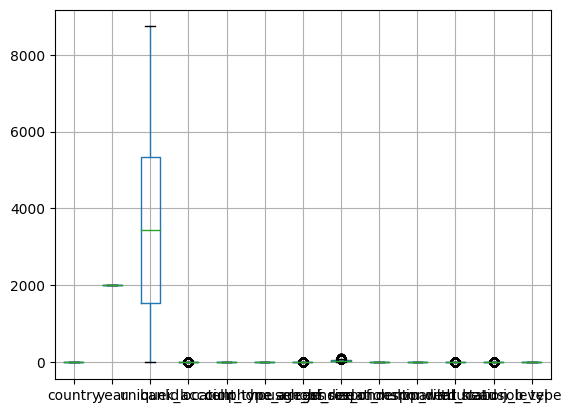

In [10]:
#Checking for outliers
data.boxplot()

In [11]:
#Using interquatile range to remove outliers from the dataset
#Find the Q1, Q3, and IQR for each column
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Remove the outliers from the dataframe
data_outliers = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Print the shape of the original and cleaned dataframe
print("Original dataframe shape:", data.shape)
print("Cleaned dataframe shape:", data_outliers.shape)

Original dataframe shape: (23524, 13)
Cleaned dataframe shape: (13705, 13)


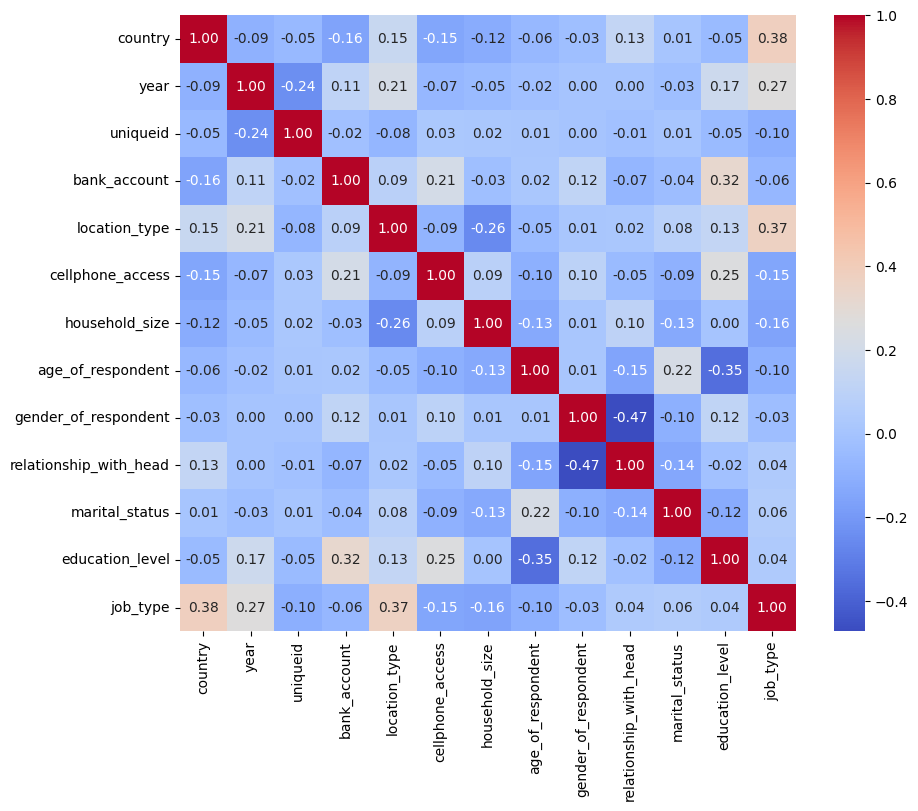

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # You can adjust the size of the figure
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

plt.show()

In [13]:
# Define features (x) and target variable(y)
X = data[['country', 'education_level','cellphone_access']]
y = data['bank_account']


#Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)


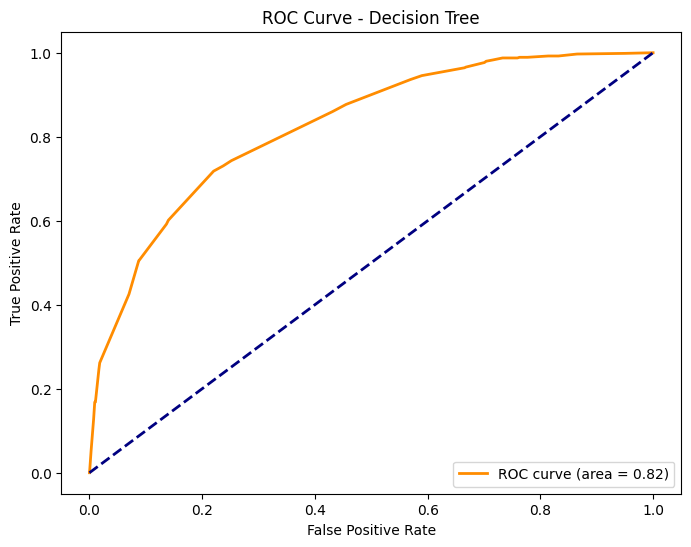

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#create and train the Decision Tree model
data_model = DecisionTreeClassifier()
data_model.fit(X_train, y_train)

#Predict probabilities for the positive class
y_probs = data_model.predict_proba(X_test)[:,1]


#compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.show()

In [15]:
from sklearn.metrics import accuracy_score, classification_report

#Predict the target variable on the test set
y_pred = data_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.88
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.94      4063
           1       0.70      0.25      0.36       642

    accuracy                           0.88      4705
   macro avg       0.80      0.61      0.65      4705
weighted avg       0.87      0.88      0.86      4705



In [16]:
import pickle

In [17]:
with open ('classifer.pkl', 'wb') as model_file:
   pickle.dump(data_model, model_file)

In [18]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.6 MB/s eta 0:00:00


In [19]:
%%writefile app.py

import pickle
import streamlit as st
import numpy as np

# Title of the application
st.title('Bank Account Prediction')

# Load the trained machine learning model
def load_model():
    with open('classifer.pkl', 'rb') as model_file:
        model = pickle.load(model_file)
    return model
model = load_model()

# Define features variable outside of the prediction button scope
features = []

# Input fields for features
feature1 = st.text_input('country')
feature2 = st.slider('education_level', 0 , 5)
feature3 = st.text_input('cellphone_access', 0, 1)

# Validation button
if st.button('Validate'):
    # Validation logic
    st.write('Country:', feature1)
    st.write('Education Level:', feature2)
    st.write('Cellphone Access:', feature3)
    st.write('Validation complete!')

# Prediction button
if st.button('Predict'):
  features.append(feature1)
  features.append(feature2)
  features.append(feature3)

  # Make predictions
  prediction = model.predict(np.array(features).reshape(1, -1))

  # Display prediction
  st.write('Prediction:', prediction)

Writing app.py


In [20]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 2.019s

3 packages are looking for funding
  run `npm fund` for details

found 1 moderate severity vulnerability
  run `npm audit fix` to fix them, or `npm audit` for details


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501 & curl -s ipv4.icanhazip.com

34.81.65.10



  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.81.65.10:8501

npx: installed 22 in 2.306s
your url is: https://fancy-buckets-wonder.loca.lt
